In [7]:
from utils import *
from GAN import *
import os
import numpy as np
import torch
from torch.autograd import Variable
import torch.distributions as ds
import matplotlib.pyplot as plt

In [8]:
latent_dim = 2 # 2d Gaussian
HIDDEN_SIZE = 128
EPOCH_SIZE = 20000
BATCH_SIZE = 1000

In [16]:
gan = GAN(latent_dim, HIDDEN_SIZE)
grid = False

In [17]:
if grid:
    DIR_NAME = 'GAN_2dgrid'
    create = create_grid
    mode_count = count_mode_grid
else:
    DIR_NAME = 'GAN_2dring'
    create = create_ring
    mode_count = count_mode_ring
    
os.makedirs(DIR_NAME, exist_ok=True)

[Epoch 0/20000] [D loss: 0.716521] [G loss: 0.563088]


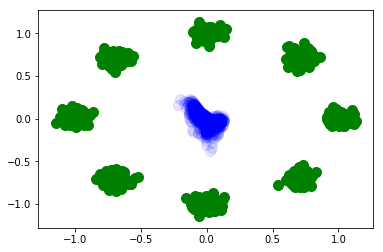

In [18]:
for epoch in range(EPOCH_SIZE):
    real_data = create(BATCH_SIZE)
    z = Variable(torch.FloatTensor(np.random.normal(0,1, (BATCH_SIZE,latent_dim))))
    
    real_data, fake_data, d_loss, g_loss = gan.optimize(BATCH_SIZE, real_data, z)
    
    if epoch % 100 == 0:
        print("[Epoch %d/%d] [D loss: %f] [G loss: %f]" % (epoch, EPOCH_SIZE, d_loss, g_loss))
        fig = plt.figure()
        ax1 = fig.add_subplot(111)
        ax1.scatter(x=real_data[:,0], y=real_data[:,1], c='g', s=100)
        ax1.scatter(x=fake_data[:,0], y=fake_data[:,1], c='b',alpha=0.1, s=100)
        plt.show()
        
        fig.savefig('{}/{}.png'.format(DIR_NAME, epoch))

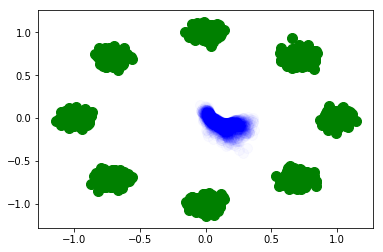

In [19]:
batch_size = 2500
real_normals = create(batch_size)
z = Variable(torch.FloatTensor(np.random.normal(0,1, (batch_size,latent_dim))))
fake_normals = gan.G(z)
fake_normals = fake_normals.detach().numpy()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x=real_normals[:,0], y=real_normals[:,1], c='g', s=100)
ax1.scatter(x=fake_normals[:,0], y=fake_normals[:,1], c='b',alpha=0.02, s=100)
plt.show()

fig.savefig('{}/final.png'.format(DIR_NAME))

In [20]:
count_mode_grid(fake_normals)

Number of Modes Captured: 0
Number of Points Falling Within 3 std. of the Nearest Mode 0


(0, 0)